In [12]:
!pip install openai==0.28

  Obtaining dependency information for openai==0.28 from https://files.pythonhosted.org/packages/ae/59/911d6e5f1d7514d79c527067643376cddcf4cb8d1728e599b3b03ab51c69/openai-0.28.0-py3-none-any.whl.metadata
  Obtaining dependency information for aiohttp from https://files.pythonhosted.org/packages/97/e7/575ca16871071313a7a7a03fa055f0c3d52f77eb8583b373ac17fc87ec15/aiohttp-3.9.5-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for aiosignal>=1.1.2 from https://files.pythonhosted.org/packages/76/ac/a7305707cb852b7e16ff80eaf5692309bde30e2b1100a1fcacdc8f731d97/aiosignal-1.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for frozenlist>=1.1.1 from https://files.pythonhosted.org/packages/af/b2/904500d6a162b98a70e510e743e7ea992241b4f9add2c8063bf666ca21df/frozenlist-1.4.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for multidict<7.0,>=4.5 from https://files.pythonhosted.org/packages/21/db/3403263f158b0bc7b0d4653766d71

In [13]:
import os
import pandas as pd
import gzip
import json

In [14]:
file_path = '/Users/az/Downloads/MACS30200_final_project/Data/Tokenized_Texts_1985.csv'

# Reload the DataFrame
preprocessed_df = pd.read_csv(file_path, encoding='utf-8-sig')

# Convert the 'date' column to datetime format
preprocessed_df['date'] = pd.to_datetime(preprocessed_df['date'])
print("DataFrame reloaded successfully.")

DataFrame reloaded successfully.


In [20]:
preprocessed_df.shape

(375302, 5)

In [18]:
preprocessed_df.head(100)

,date,title,text,preprocessed_text
0,1985-01-01,和衷共济搞四化——一九八五年元旦献词,和衷共济搞四化\n ——一九八五年元旦献词\n 岁月之树又增添了一周新的...,和衷共济 搞 四化 \n 一九八五年 元旦 献词 \n ...
1,1985-01-01,一九八五年一月上旬天气展望,一九八五年一月上旬天气展望\n 据新华社北京12月31日电 中央气象台对198...,一九八五年 一月 上旬 天气 展望 \n 新华社 北京 12...
2,1985-01-01,血液换出稀释法可治疗脑血栓,血液换出稀释法可治疗脑血栓\n 山东省济宁市第二人民医院用血液换出稀释法治疗脑...,血液 换 出 稀释 法可 治疗 脑血栓 \n 山东省 济宁市...
3,1985-01-01,玻利维亚紧张局势得到缓和 拒绝交权的前陆军司令奥尔维斯被迫投降,玻利维亚紧张局势得到缓和\n 拒绝交权的前陆军司令奥尔维斯被迫投降\n ...,玻利维亚 紧张局势 得到 缓和 \n 拒绝 交权 前 陆军 ...
4,1985-01-01,北京假肢科研所主体工程奠基,北京假肢科研所主体工程奠基\n 本报讯 民政部北京假肢科研主体工程12月31...,北京 假肢 科研所 主体工程 奠基 \n 本报讯 民...
...,...,...,...,...
95,1985-01-02,今天的黄洋界,今天的黄洋界\n 金近\n 我们刚进入井冈山，汽车沿着盘山公路一圈一圈地...,今天 黄洋界 \n 金近 \n 刚 进入 井...
96,1985-01-02,某师为建设泰山风景区做贡献,某师为建设泰山风景区做贡献\n 本报讯 驻守在泰山脚下的济南军区某师开展“为...,某师 建设 泰山 风景区 做 贡献 \n 本报讯 驻...
97,1985-01-02,我南极长城站奠基典礼在乔治岛举行,我南极长城站奠基典礼在乔治岛举行\n 新华社乔治岛1984年12月31日电（联...,南极 长城站 奠基典礼 乔治岛 举行 \n 新华社 乔治岛 ...
98,1985-01-02,西哈努克民族主义军 深入洞里萨湖地区打击越军,西哈努克民族主义军\n 深入洞里萨湖地区打击越军\n 新华社曼谷1月1日...,西哈努克 民族主义 军 \n 深入 洞里萨湖 地区 打击 越...


In [21]:
import openai

openai.api_key = 'sk-proj-BPropWZska4yQfnCUkNbT3BlbkFJugzDs2FfHFOdBFsqczuj'

# Function to classify text using OpenAI
def classify_text(text):
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a classifier. Classify the following text into categories: Business, Military, Politics, Technology, Economy, Others. Your answer should only be composed by the word list below: Business, Military, Politics, Technology, Economy, Others. "},
                {"role": "user", "content": text}
            ]
        )
        return response.choices[0].message['content'].strip()
    except Exception as e:
        return str(e)

# Apply the classify_text function to the first 100 rows of the preprocessed_text column
preprocessed_df['result'] = preprocessed_df['preprocessed_text'].head(100).apply(classify_text)

# Save the resulting DataFrame with the first 100 rows to a new CSV file
preprocessed_df.head(100).to_csv('/Users/az/Downloads/MACS30200_final_project/Results/classified_results.csv', index=False)

print("Results saved successfully to 'classified_results.csv'.")


Results saved successfully to 'classified_results.csv'.


In [27]:
# Handle NaN values by replacing them with an empty string before filtering
preprocessed_df['preprocessed_text'] = preprocessed_df['preprocessed_text'].fillna('')

# Filter the DataFrame for rows where 'preprocessed_text' contains the word "扶贫"
filtered_df = preprocessed_df[preprocessed_df['preprocessed_text'].str.contains("扶贫")]

# Save the filtered DataFrame to a new CSV file
output_path = '/Users/az/Downloads/MACS30200_final_project/Data/poverty_alleviation_1985.csv'
filtered_df.to_csv(output_path, index=False)

# Print the number of articles containing "扶贫"
print(f"Number of articles containing '扶贫': {len(filtered_df)}")

Number of articles containing '扶贫': 2914


Politics                 49
Others                   17
Military                 10
Economy                   8
Business                  7
Technology                6
Business, Economy.        1
Sports                    1
After a manual check, the gpt is able to identify most of the politics content, but 13/17 are also political content. 

In [8]:
import gensim
from gensim.models.fasttext import load_facebook_model

# Load a pre-trained Chinese word embedding model
model_path = '/Users/az/Downloads/MACS30200_final_project/Model/cc.zh.300.bin'
model = load_facebook_model(model_path)

# Define your seed word
initial_words = ['扶贫']  # Start with the known poverty-related seed word

# Function to find new related words based on cosine similarity
def expand_words(seed_words, model, num_new_words=10):
    new_words = list(seed_words)

    while len(new_words) < len(seed_words) + num_new_words:
        highest_similarity_word = None
        highest_similarity = 0
        
        # Compute the highest similarity word that is not already in new_words
        for word in new_words:
            if word in model.wv.key_to_index:  # Use .key_to_index for Gensim 4.x
                similar_words = model.wv.most_similar(word, topn=100)
                for w, sim in similar_words:
                    if sim > highest_similarity and w not in new_words:
                        highest_similarity_word = w
                        highest_similarity = sim

        # Check if a new word was found
        if highest_similarity_word:
            new_words.append(highest_similarity_word)
        else:
            print("No new word meeting the criteria was found.")
            break

    return new_words

# Expand the word list
expanded_words = expand_words(initial_words, model)
print("Expanded words list:", expanded_words)




Expanded words list: ['扶贫', '脱贫', '脱贫致富', '致富路', '济弱', '救困', '助孤', '助弱', '扶困', '恤孤', '扶残']


In [11]:
import pandas as pd

file_path = '/Users/az/Downloads/MACS30200_final_project/Data/Tokenized_Texts_1985.csv'

# Reload the DataFrame with the specified encoding
preprocessed_df = pd.read_csv(file_path, encoding='utf-8-sig')

# Handle NaN values by replacing them with an empty string before filtering
preprocessed_df['preprocessed_text'] = preprocessed_df['preprocessed_text'].fillna('')

# Define the list of keywords related to poverty alleviation
keywords = ['扶贫', '脱贫', '脱贫致富', '致富路', '济弱', '救困', '助孤', '助弱', '扶困', '恤孤', '扶残']

# Filter the DataFrame for rows where 'preprocessed_text' contains any of the keywords
pattern = '|'.join(keywords)  # Create a pattern string using regex OR operator
filtered_df = preprocessed_df[preprocessed_df['preprocessed_text'].str.contains(pattern)]

# Save the filtered DataFrame to a new CSV file
output_path = '/Users/az/Downloads/MACS30200_final_project/Data/poverty_alleviation_1985.csv'
filtered_df.to_csv(output_path, index=False)

# Print the number of articles containing any of the keywords
print(f"Number of articles containing keywords related to poverty alleviation: {len(filtered_df)}")

Number of articles containing keywords related to poverty alleviation: 5103


In [1]:
import pandas as pd

file_path = '/Users/az/Downloads/MACS30200_final_project/Data/Tokenized_Texts_1985.csv'

# Reload the DataFrame
preprocessed_df = pd.read_csv(file_path, encoding='utf-8-sig')
preprocessed_df['date'] = pd.to_datetime(preprocessed_df['date'])
articles_per_year = preprocessed_df.groupby(preprocessed_df['date'].dt.year)['text'].count()

# Print the number of articles per year
print("Number of articles per year:")
print(articles_per_year)

Number of articles per year:
date
1985    34303
1986    33491
1987    32680
1988    33551
1989    30046
1990    31719
1991    33827
1992    37365
1993    36511
1994    34001
1995    37630
Name: text, dtype: int64


In [3]:
output_path = '/Users/az/Downloads/MACS30200_final_project/Data/poverty_alleviation_1985.csv'
# Reload the DataFrame
filtered_df = pd.read_csv(output_path, encoding='utf-8-sig')
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_articles_per_year = filtered_df.groupby(filtered_df['date'].dt.year)['text'].count()

# Print the number of articles per year
print("Number of filtered articles per year:")
print(filtered_articles_per_year)

Number of filtered articles per year:
date
1985    195
1986    505
1987    470
1988    341
1989    294
1990    442
1991    438
1992    458
1993    405
1994    683
1995    872
Name: text, dtype: int64


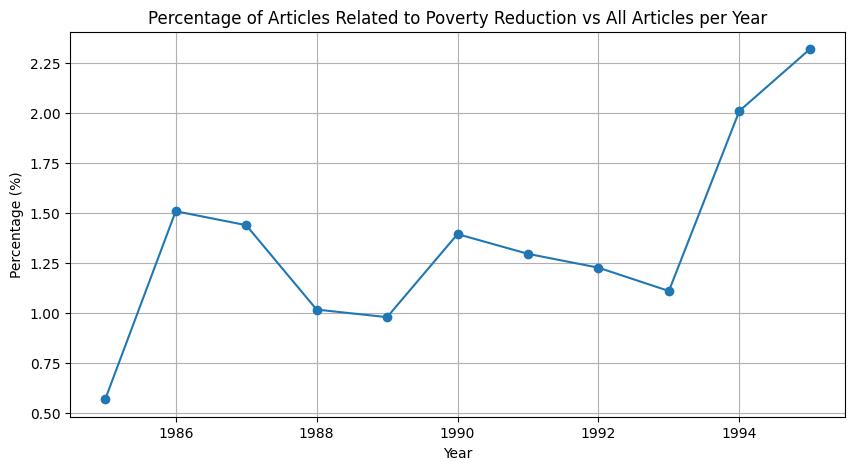

In [5]:
import matplotlib.pyplot as plt

percentage_articles = (filtered_articles_per_year / articles_per_year * 100).dropna()

# Plotting the data
plt.figure(figsize=(10, 5))
percentage_articles.plot(kind='line', marker='o')
plt.title('Percentage of Articles Related to Poverty Reduction vs All Articles per Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.grid(True)
plt.show()